Yumeng

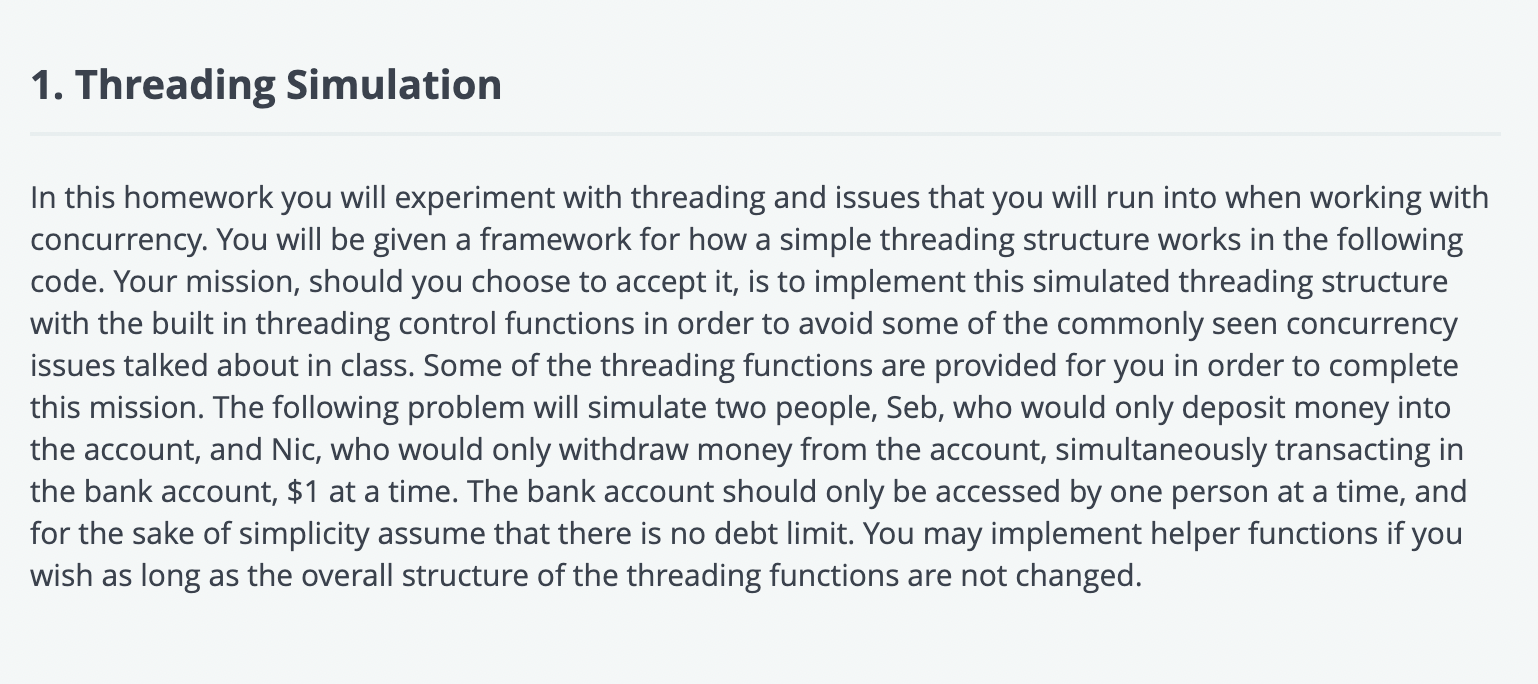

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys

temp_bank_account = 0
seb_bank_account = 0
nic_bank_account = 0
current_thread = ""
seb_thread_acq = False
nic_thread_acq = False

class lock():
    def __init__(self):
        self.lock_flag = False
        self.thread_acq = ""
    def acquire(self):
        global current_thread
        if self.lock_flag == False:
            self.lock_flag = True
            self.thread_acq = current_thread
        else:
            return "Locked"
    def release(self):
        self.lock_flag = False
        self.thread_acq = ""

# The class lock() contains the methods acquire() and release()

bank_account = 0
var_lock = lock()


def transaction(seb, nic):
    
    # In this function you need to complete the code using some of the threading functions
    # provided above. Assume that the loop continues running (thread continues running) until
    # both Seb and Nic has completed their prearranged number of transactions
    #
    # In order to make the following function work you need to implement thread controls using
    # the lock class implemented above (var_lock)
    #
    # Think about when each global variable is being used and how to handle multiple threads
    # trying to access the global variable at the same time
    #
    # Try to describe what you think each line of the following code does in a live threading
    # environment
    
    global bank_account
    global seb_thread_acq
    global nic_thread_acq
    global var_lock
    global current_thread
    
    seb_runs = seb
    nic_runs = nic
    
    while seb_runs > 0 or nic_runs > 0:
        
        current_thread = run_thread(seb_runs, nic_runs)
        
        var_status = thread_acquire_var(current_thread)
        
        if var_status == "Locked":
            continue
        
        var_lock.acquire()  #
        
        if current_thread == "Seb":
            if seb_thread_acq == False:
                # var_lock.acquire()
                seb_runs += seb_thread()
                seb_thread_acq = True
                # var_lock.release()
                continue
            else:
                # var_lock.acquire()
                update_thread()
                seb_thread_acq = False
                seb_runs -= 1
                # var_lock.release()
        else:
            if nic_thread_acq == False:
                nic_runs += nic_thread()
                nic_thread_acq = True
                continue
            else:
                update_thread()
                nic_thread_acq = False
                nic_runs -= 1
        
        var_lock.release()  #
    
    return bank_account

    


def seb_thread():
    global var_lock
    global temp_bank_account
    global bank_account
    if not var_lock.lock_flag or (var_lock.lock_flag and var_lock.thread_acq == "Seb"):
        temp_bank_account = seb_bank_account + 1
        return 0
    else:
        return 1


def nic_thread():
    global var_lock
    global temp_bank_account
    global bank_account
    if not var_lock.lock_flag or (var_lock.lock_flag and var_lock.thread_acq == "Nic"):
        temp_bank_account = nic_bank_account - 1
        return 0
    else:
        return 1


def update_thread():
    global bank_account
    global temp_bank_account
    bank_account = temp_bank_account


def thread_acquire_var(user):
    global seb_bank_account
    global nic_bank_account
    global bank_account
    global var_lock
    if user == "Seb":
        if (var_lock.lock_flag and var_lock.thread_acq == "Seb") or not var_lock.lock_flag:
            seb_bank_account = bank_account
            return "Seb"
        else:
            return "Locked"
    else:
        if (var_lock.lock_flag and var_lock.thread_acq == "Nic") or not var_lock.lock_flag:
            nic_bank_account = bank_account
            return "Nic"
        else:
            return "Locked"


def run_thread(seb_runs, nic_runs):
    if seb_runs == 0:
        return "Nic"
    if nic_runs == 0:
        return "Seb"
    rnd = random.random()
    if rnd > 0.5:
        return "Seb"
    else:
        return "Nic"


if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    seb = int(input().strip())

    nic = int(input().strip())

    result = transaction(seb, nic)

    fptr.write(str(result) + '\n')

    fptr.close()


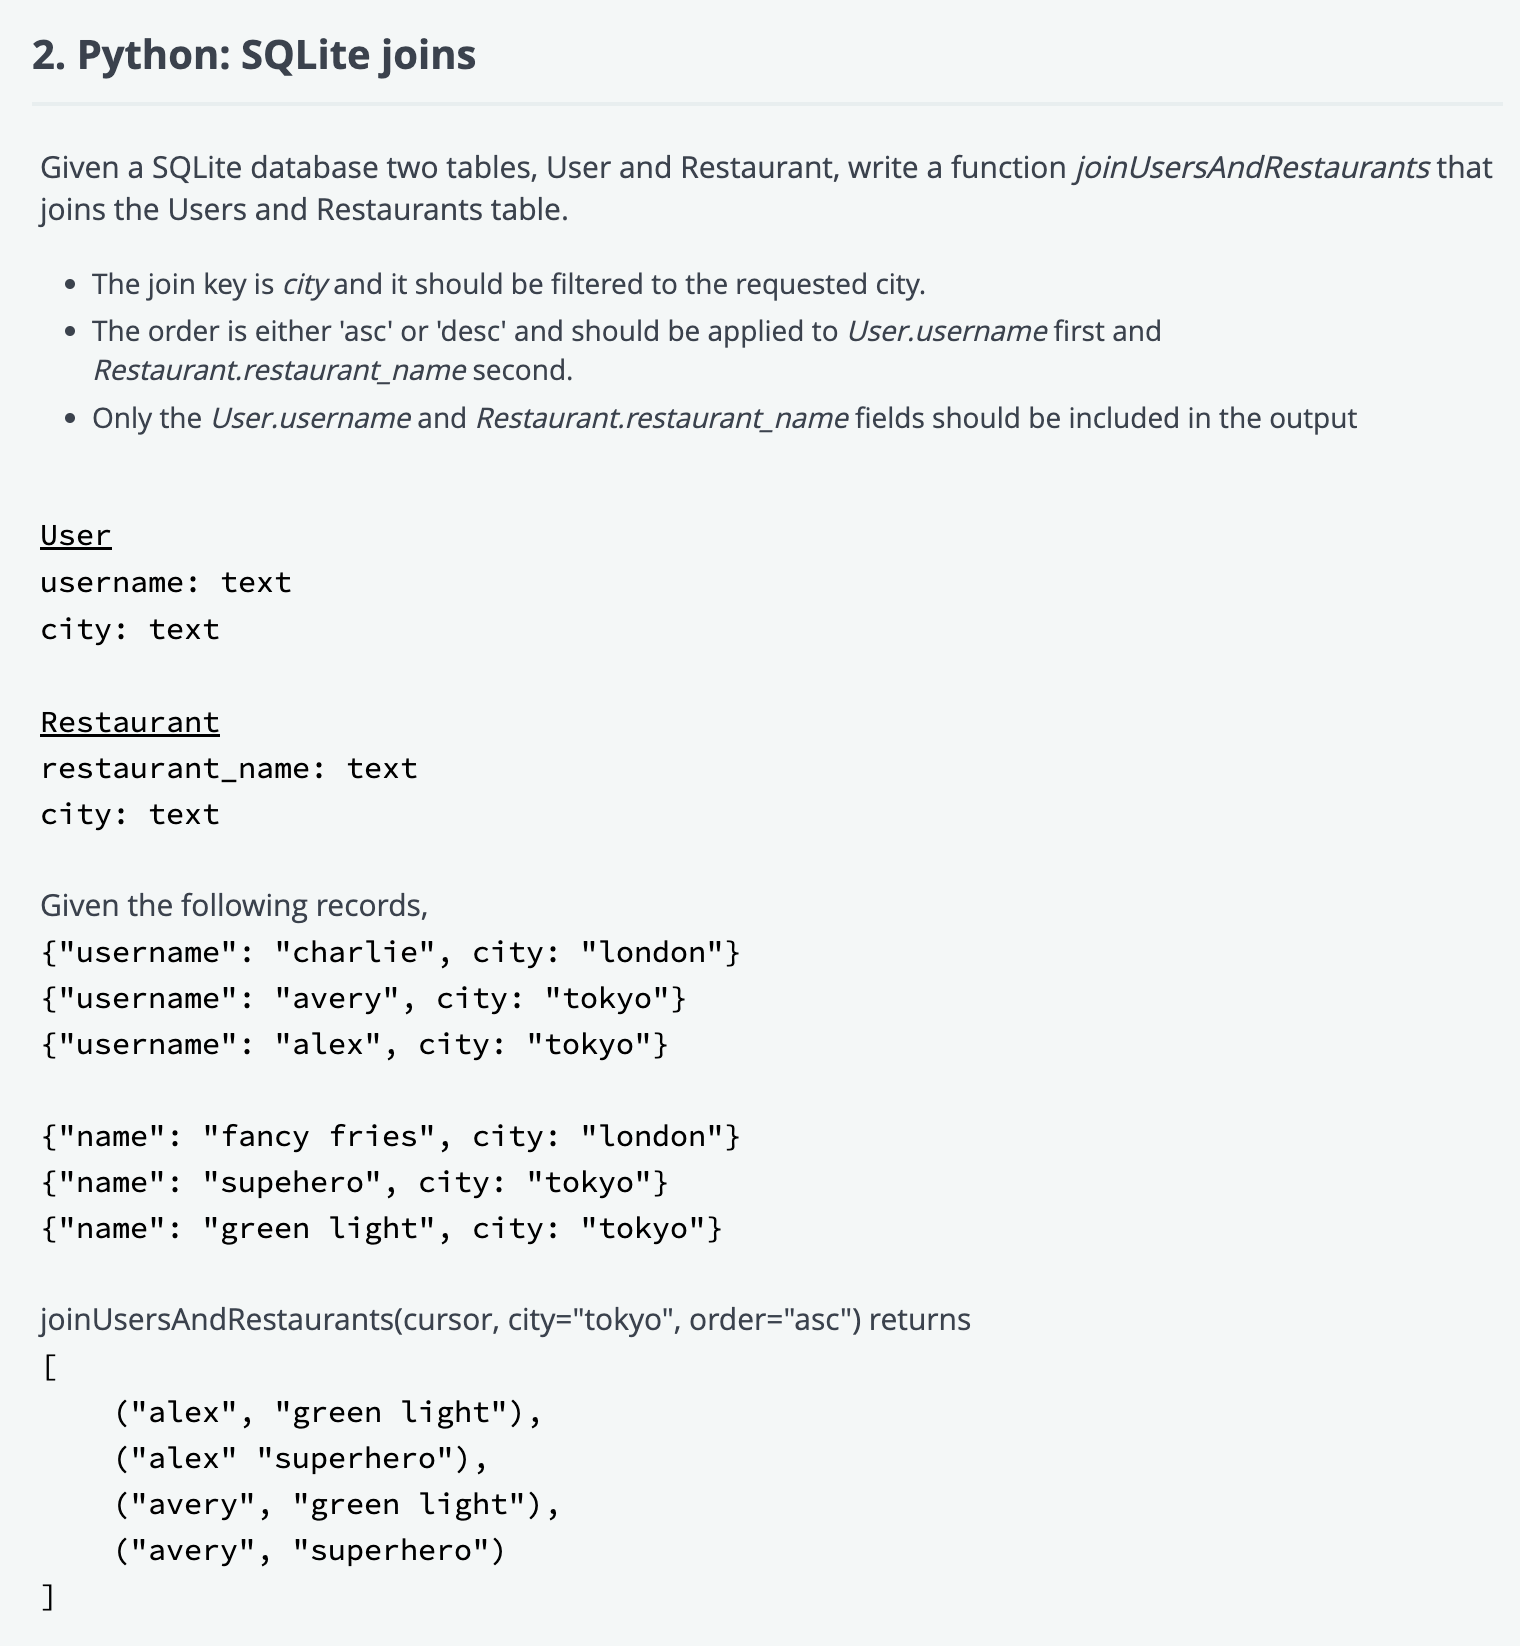

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys

import sqlite3

def joinUsersAndRestaurants(cursor, city, order="asc"):
    # Implement your function here 
    
    sql = '''SELECT username,restaurant_name
    FROM users
    LEFT JOIN restaurants USING(city)
    WHERE city = '''+"'"+city+"'"+'''
    ORDER BY username '''+order+''',restaurant_name '''+order+''';''' 
    
    # print(sql)

    return cursor.execute(sql)
    
    # result = cursor.fetchall()
    # for row in result:
    #     print(row)   



if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    conn = sqlite3.connect(":memory:")
    c = conn.cursor()

    users = []
    n = int(input())
    for i in range(n):
        name, city = input().split()
        users.append((name, city))
    assert len(set(e[0] for e in users)) == n

    c.execute("CREATE TABLE users (username text, city text)")
    c.executemany("INSERT INTO users VALUES (?, ?)", users)
    conn.commit()

    restaurants = []
    m = int(input())
    for i in range(m):
        name, city = input().split()
        restaurants.append((name, city))
    assert len(set(e[0] for e in restaurants)) == m

    c.execute("CREATE TABLE restaurants (restaurant_name text, city text)")
    c.executemany("INSERT INTO restaurants VALUES (?, ?)", restaurants)
    conn.commit()


    city, order = input().split()

    c = conn.cursor()
    results = joinUsersAndRestaurants(c, city=city, order=order)
    assert results
    for username, restaurant_name in results:
        fptr.write(f"{username} {restaurant_name}\n")
    conn.close()

    fptr.close()


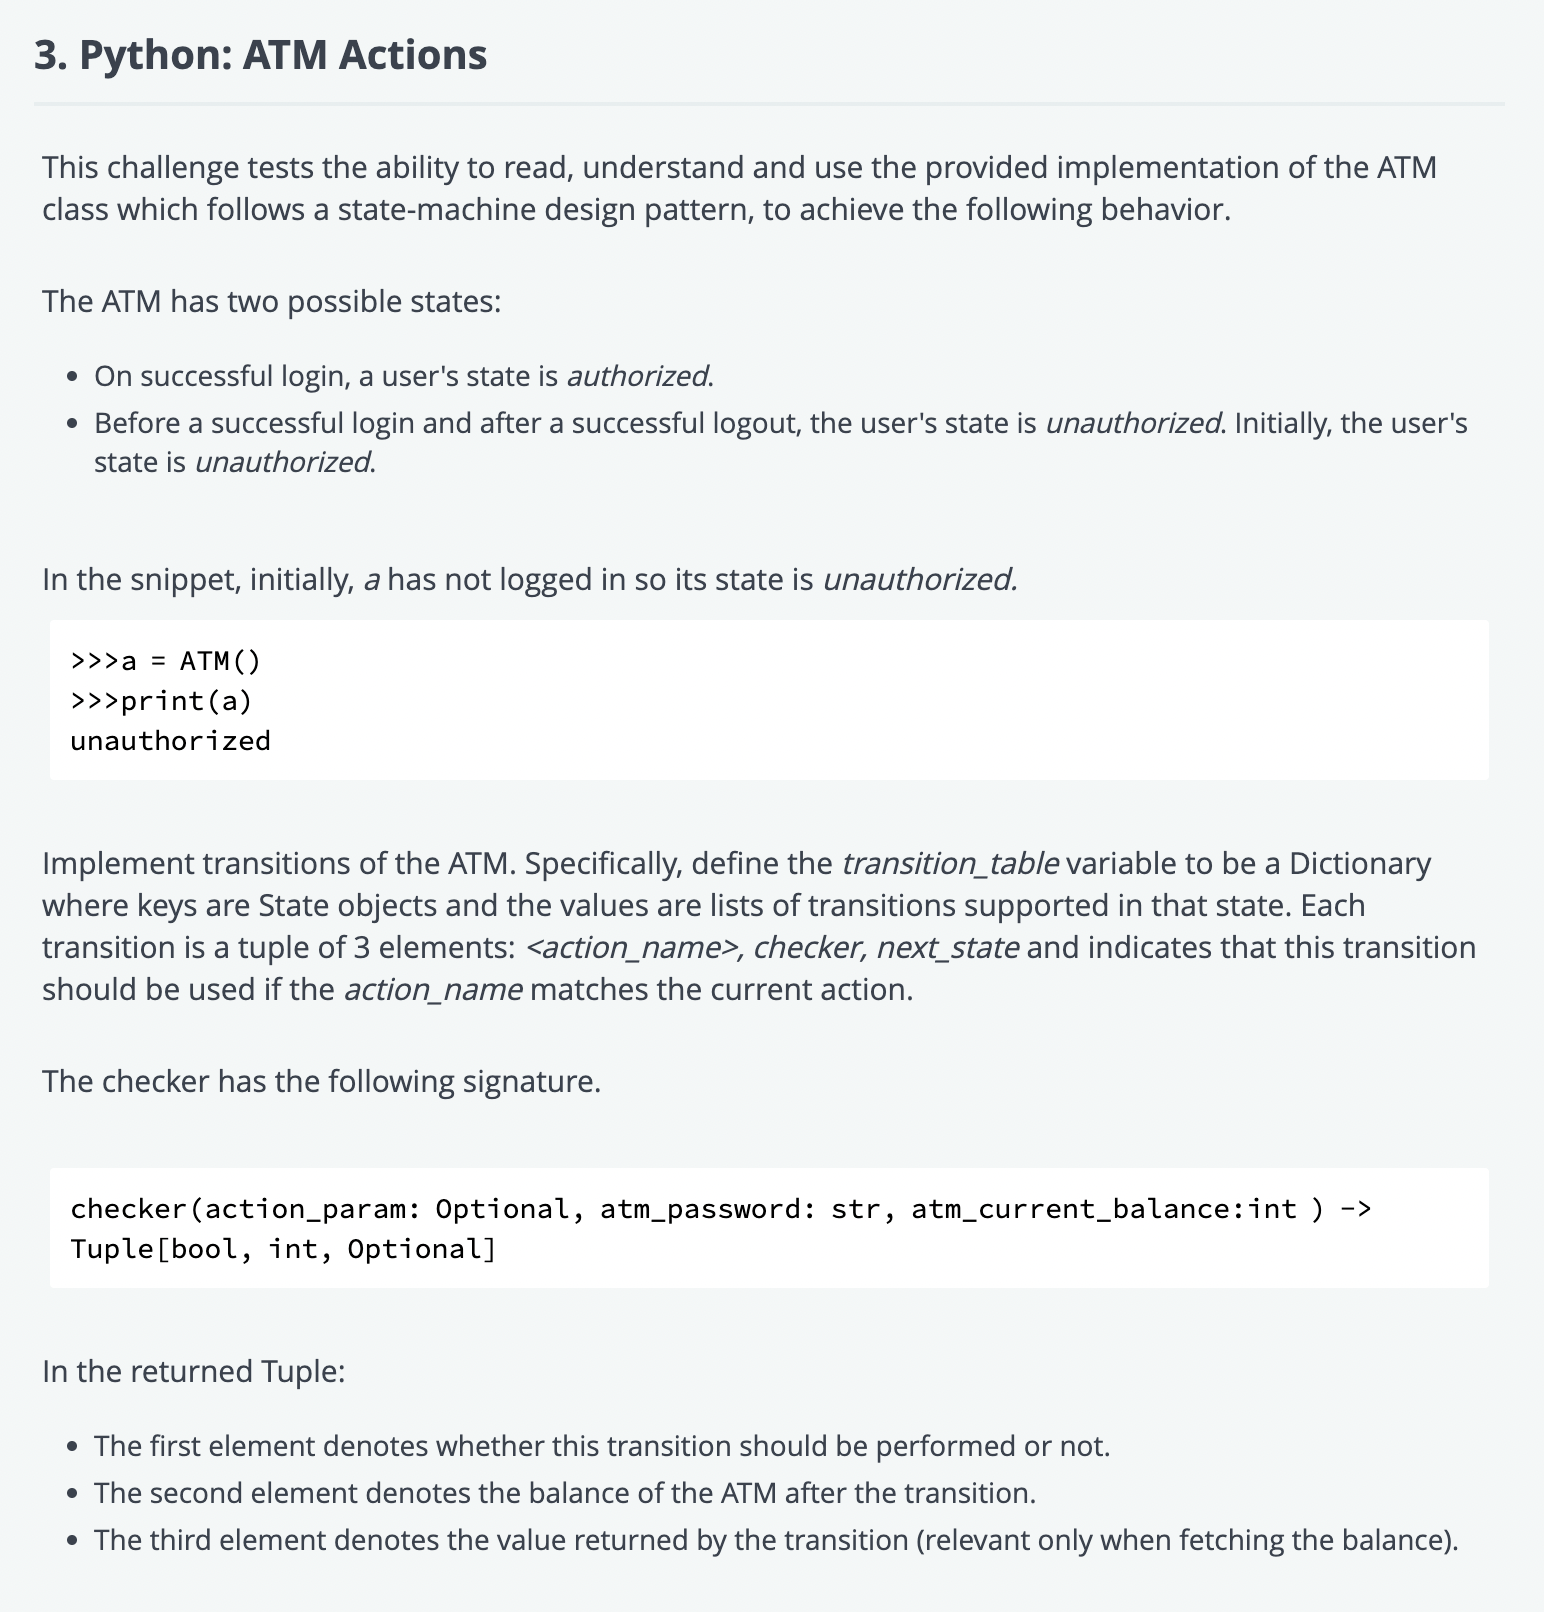

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys
from typing import Dict, Optional, Tuple, Any

Action = str

from enum import Enum
class State(Enum):
    # Implement the State class here
    AUTHORIZED = "authorized"
    UNAUTHORIZED = "unauthorized"
    
    def __str__(self):
        return f'{self.name}'

def check_login(param,password,balance):
    if param == password:
        return (True,balance,None)
    else:
        return (False,balance,None)

def check_logout(param,password,balance):
    return (True,balance,None)

def check_deposit(param,password,balance):
    return (True,balance+param,None)

def check_withdraw(param,password,balance):
    if param<=balance:
        return (True,balance-param,None)
    else:
        return (False,balance,None)

def check_balance(param,password,balance):
    return (True,balance,balance)

# tran1 = ("login",check_login,State.AUTHORIZED)
# tran2 = ("logout",check_logout,State.UNAUTHORIZED)
# tran3 = ("deposit",check_deposit,State.AUTHORIZED)
# tran4 = ("withdraw",check_withdraw,State.AUTHORIZED)
# tran5 = ("balance",check_balance,State.AUTHORIZED)

tran1 = ("login",check_login,"authorized")
tran2 = ("logout",check_logout,"unauthorized")
tran3 = ("deposit",check_deposit,"authorized")
tran4 = ("withdraw",check_withdraw,"authorized")
tran5 = ("balance",check_balance,"authorized")

# Implement the transition_table here
transition_table = {}
transition_table["authorized"] = [tran2,tran3,tran4,tran5]
transition_table["unauthorized"] = [tran1]

# Implement the init_state here
# init_state = State.UNAUTHORIZED
init_state = "unauthorized"

# Look for the implementation of the ATM class in the below Tail section

if __name__ == "__main__":
    class ATM:
        def __init__(self, init_state: State, init_balance: int, password: str, transition_table: Dict):
            self.state = init_state
            self._balance = init_balance
            self._password = password
            self._transition_table = transition_table

        def next(self, action: Action, param: Optional) -> Tuple[bool, Optional[Any]]:
            try:
                for transition_action, check, next_state in self._transition_table[self.state]:
                    if action == transition_action:
                        passed, new_balance, res = check(param, self._password, self._balance)
                        if passed:
                            self._balance = new_balance
                            self.state = next_state
                            return True, res
            except KeyError:
                pass
            return False, None


    if __name__ == "__main__":
        fptr = open(os.environ['OUTPUT_PATH'], 'w')
        password = input()
        init_balance = int(input())
        atm = ATM(init_state, init_balance, password, transition_table)
        q = int(input())
        for _ in range(q):
            action_input = input().split()
            action_name = action_input[0]
            try:
                action_param = action_input[1]
                if action_name in ["deposit", "withdraw"]:
                    action_param = int(action_param)
            except IndexError:
                action_param = None
            success, res = atm.next(action_name, action_param)
            if res is not None:
                fptr.write(f"Success={success} {atm.state} {res}\n")
            else:
                fptr.write(f"Success={success} {atm.state}\n")

        fptr.close()


In [ ]:
######### Aman version #########


import math
import os
import random
import re
import sys



#
# Complete the 'countWaysToCreateWave' function below.
#
# The function is expected to return an INTEGER.
# The function accepts following parameters:
#  1. INTEGER_ARRAY arr
#  2. INTEGER m
#
# Given an array arr of n integers, consisting of integers in the range 1 to m inclusive, or -1, 
# find the number of ways to replace all the -1s in the array with an integer in the range 1 to m such that the resulting array 
# can be represented as a wave.
# Since the answer can be large, compute it modulo 10^9 + 7.

def countWaysToCreateWave(arr, m):
    #defining the length of the array
    n = len(arr)
    # creating a really huge number
    mod = 7+(10**9)
    
    # creating two DP arrays to store the number of ways to create a wave
    # there are two cases with the first element as -1 vs any other number <= m
    if arr[0] == -1:
        dp_up = [1 for x in range(m+1)]
        dp_down = [1 for x in range(m+1)]
    else:
        dp_up = [0 for x in range(m+1)]
        dp_down = [0 for x in range(m+1)]
        dp_up[arr[0]] = 1 
        dp_down[arr[0]] = 1 
    
    count = 0
    
    def get_sum(dp, first):
        # helper function to get the sum of the array
        begin = first
        for i in range(1,n):
            total = 0 
            if begin == "UP":
                if arr[i] == -1:
                    for j in range(1,m+1):
                        dp[j], total = total, total + dp[j]
                else:
                    for j in range(1,arr[i]):
                        total += dp[j]
                    dp = [0 for x in range(m+1)]
                    dp[arr[i]] = total 
                begin = "DOWN"
            else:
                if arr[i] == -1:
                    for j in range(m,0,-1):
                        dp[j], total = total, total + dp[j]
                else:
                    for j in range(m,arr[i],-1):
                        total += dp[j]
                    dp = [0 for x in range(m+1)]
                    dp[arr[i]] = total
                begin = "UP"
        return sum(dp[1:])
    
    count = (get_sum(dp_up, "UP")+get_sum(dp_down, "DOWN"))%mod      
                         
    return count


In [ ]:
######### my version (super correct but time exceeding) #########


#!/bin/python3

import math
import os
import random
import re
import sys



#
# Complete the 'countWaysToCreateWave' function below.
#
# The function is expected to return an INTEGER.
# The function accepts following parameters:
#  1. INTEGER_ARRAY arr
#  2. INTEGER m
#

def helper(arr,m,direction,before):
    
    if len(arr)==0:
        return 0
    
    if len(arr)==1:
        if arr[0]!=-1:
            return 1
        else:
            if direction==True:
                return (m-before)
            elif direction==False:
                return (before-1)
    
    if arr[0]!=-1:
        if direction==True:
            result = helper(arr[1:],m,False,arr[0])
            return int(result%(1e9+7))
        elif direction==False:
            result = helper(arr[1:],m,True,arr[0])
            return int(result%(1e9+7))
        
    elif arr[0]==-1:
        
        if arr[1]==-1:
            
            # print(before)
            # print(arr[0:2])
                        
            if direction==True:
                result = 0
                for a in range(before+1,m+1):
                    result += helper(arr[1:],m,False,a)
                return int(result%(1e9+7))
            
            elif direction==False:
                result = 0
                for a in range(1,before):
                    result += helper(arr[1:],m,True,a)
                return int(result%(1e9+7))
                    
        elif arr[1]!=-1:
            
            if direction==True:
                result = 0
                for a in range(max(before,arr[1])+1,m+1):
                    result += helper(arr[1:],m,False,a)
                return int(result%(1e9+7))
            
            elif direction==False:
                result = 0
                for a in range(1,min(arr[1],before)):
                    result += helper(arr[1:],m,True,a)
                return int(result%(1e9+7))
                


def if_up(arr):   # up = True  down = False
    
    for i in range(len(arr)-1):
        a1 = arr[i]
        a2 = arr[i+1]
        
        if a1!=-1 and a2!=-1:
            if a1>a2 and i%2==0:
                return False
            elif a1>a2 and i%2==1:
                return True
            elif a1<a2 and i%2==0:
                return True
            elif a1<a2 and i%2==1:
                return False
    
    return None

def countWaysToCreateWave(arr, m):
    # Write your code here
    
    # return arr
    # return m

    if len(arr)==0:
        return 0
    
    if len(arr)==1:
        if arr[0]==-1:
            return m
        else:
            return 1
    
    direction = if_up(arr)
    
    count = 0
    
    if arr[0]!=-1:
        if direction==None:
            result = helper(arr[1:],m,True,arr[0])+helper(arr[1:],m,False,arr[0])
            return int(result%(1e9+7))
        elif direction==True:
            result = helper(arr[1:],m,True,arr[0])
            return int(result%(1e9+7))
        elif direction==False:
            result = helper(arr[1:],m,False,arr[0])
            return int(result%(1e9+7))
    
    elif arr[0]==-1:
        
        if arr[1]==-1:
            
            if direction==None:
                result = 0
                for a in range(1,m+1):
                    result += helper(arr[1:],m,True,a)
                    result += helper(arr[1:],m,False,a)
                return int(result%(1e9+7))
            
            elif direction==True:
                result = 0
                for a in range(1,m+1):
                    result += helper(arr[1:],m,True,a)
                return int(result%(1e9+7))
            
            elif direction==False:
                result = 0
                for a in range(1,m+1):
                    result += helper(arr[1:],m,False,a)
                return int(result%(1e9+7))
                    
        elif arr[1]!=-1:
            
            if direction== None:
                result = 0
                for a in range(1,arr[1]):
                    result += helper(arr[1:],m,True,a)
                for a in range(arr[1]+1,m+1):
                    result += helper(arr[1:],m,False,a)
                return int(result%(1e9+7))
            
            elif direction==True:
                result = 0
                for a in range(1,arr[1]):
                    result += helper(arr[1:],m,True,a)
                return int(result%(1e9+7))
            
            elif direction==False:
                result = 0
                for a in range(arr[1]+1,m+1):
                    result += helper(arr[1:],m,False,a)
                return int(result%(1e9+7))
                

    

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    arr_count = int(input().strip())

    arr = []

    for _ in range(arr_count):
        arr_item = int(input().strip())
        arr.append(arr_item)

    m = int(input().strip())

    result = countWaysToCreateWave(arr, m)

    fptr.write(str(result) + '\n')

    fptr.close()


In [1]:
x = 1e9
x

1000000000.0

In [3]:
x = 1e2
x

100.0

In [4]:
x = 10e2
x

1000.0

In [5]:
a = "0010"
int(a)

10

In [6]:
b = "00023400"
int(b)

23400